In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Galton's Parent & Children Heights Correlation

In [3]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTfLsxuiSj5MVLl6ABGE6tBZqBEm_o3ugvbwir4ZMhNQprN9HFnfUF9GiGyYU3ChWEkW040b7QGQy0K/pub?gid=280617370&single=true&output=csv', header='infer')

In [4]:
df.head()

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


In [5]:
df.child

0      61.7
1      61.7
2      61.7
3      61.7
4      61.7
       ... 
923    73.7
924    73.7
925    73.7
926    73.7
927    73.7
Name: child, Length: 928, dtype: float64

In [6]:
mytable = pd.crosstab(df.parent, df.child)
mytable

child,61.7,62.2,63.2,64.2,65.2,66.2,67.2,68.2,69.2,70.2,71.2,72.2,73.2,73.7
parent,,,,,,,,,,,,,,
64.0,1,0,2,4,1,2,2,1,1,0,0,0,0,0
64.5,1,1,4,4,1,5,5,0,2,0,0,0,0,0
65.5,1,0,9,5,7,11,11,7,7,5,2,1,0,0
66.5,0,3,3,5,2,17,17,14,13,4,0,0,0,0
67.5,0,3,5,14,15,36,38,28,38,19,11,4,0,0
68.5,1,0,7,11,16,25,31,34,48,21,18,4,3,0
69.5,0,0,1,16,4,17,27,20,33,25,20,11,4,5
70.5,1,0,1,0,1,1,3,12,18,14,7,4,3,3
71.5,0,0,0,0,1,3,4,3,5,10,4,9,2,2


In [7]:
mytable.shape

(11, 14)

In [9]:
nrows = mytable.shape[0]
ncols = mytable.shape[1]

childHeights = list(mytable.columns)
parentHeights = list(mytable.index)

combo = [ (x,y,mytable.loc[x,y]) for x in parentHeights for y in childHeights]
combo = pd.DataFrame(combo, columns = ['x','y','freq'])

In [10]:
combo

,x,y,freq
0,64.0,61.7,1
1,64.0,62.2,0
2,64.0,63.2,2
3,64.0,64.2,4
4,64.0,65.2,1
...,...,...,...
149,73.0,70.2,0
150,73.0,71.2,0
151,73.0,72.2,1
152,73.0,73.2,3


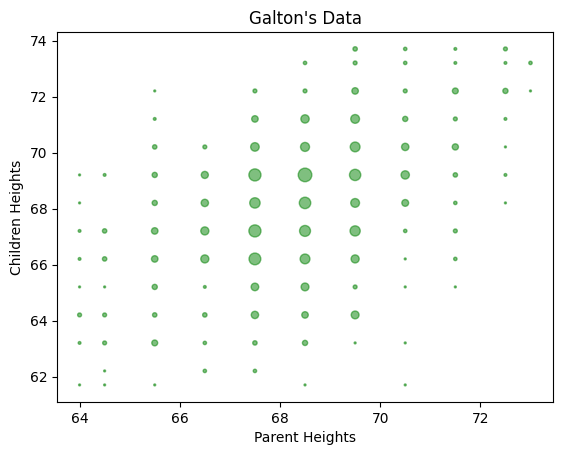

In [11]:
plt.scatter(combo.x, combo.y, s=combo.freq * 2, c='green', alpha=0.5)
plt.xlabel("Parent Heights")
plt.ylabel("Children Heights")
plt.title("Galton's Data")
plt.show()

### Linear Regression

In [12]:
lm = LinearRegression(fit_intercept=True)

In [14]:
# Train
lm.fit(df[['parent']], df[['child']])

LinearRegression()

In [15]:
lm.intercept_

array([23.94153018])

In [16]:
lm.coef_

array([[0.64629058]])

In [17]:
predY = lm.predict(df[['parent']])

In [18]:
predY

array([[69.50501621],
       [68.21243505],
       [66.2735633 ],
       [65.62727272],
       [65.30412743],
       [67.56614446],
       [67.56614446],
       [67.56614446],
       [66.91985388],
       [66.91985388],
       [66.91985388],
       [65.62727272],
       [69.50501621],
       [68.85872563],
       [68.21243505],
       [68.21243505],
       [68.21243505],
       [68.21243505],
       [68.21243505],
       [68.21243505],
       [68.21243505],
       [67.56614446],
       [67.56614446],
       [67.56614446],
       [67.56614446],
       [67.56614446],
       [66.91985388],
       [66.91985388],
       [66.91985388],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [66.2735633 ],
       [65.62727272],
       [65.62727272],
       [65.62727272],
       [65.62727272],
       [65.30412743],
       [65.30412743],
       [68.85872563],
       [68

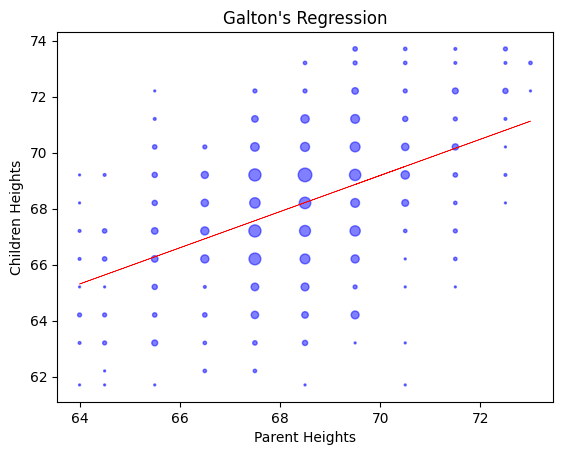

In [20]:
plt.plot(df.parent.values, predY, c = 'Red', linestyle="-", linewidth=0.5)
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='blue', alpha=0.5)
plt.xlabel("Parent Heights")
plt.ylabel("Children Heights")
plt.title("Galton's Regression")
plt.show()

## House Pricing

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQBtIFVKd7xxiax0qAjADYy5yMlHntbdF_pxRj67Qjbgl9a44qhw0AQ14_Eu8vAxiwHv7p9q8KAvp0B/pub?gid=1272501787&single=true&output=csv", sep=",")

In [23]:
data.head()

,Harga Rumah (Rp.juta),Luas Lantai (m2)
0,245,1400
1,312,1600
2,279,1700
3,308,1875
4,199,1100


In [24]:
data.describe()

,Harga Rumah (Rp.juta),Luas Lantai (m2)
count,10.000000,10.000000
mean,286.500000,1715.000000
std,60.185362,417.864944
min,199.000000,1100.000000
25%,247.500000,1456.250000
50%,293.500000,1650.000000
75%,317.250000,1831.250000
max,405.000000,2450.000000


In [26]:
X = data["Luas Lantai (m2)"]  # Feature
y = data["Harga Rumah (Rp.juta)"]  # Target

In [27]:
model = LinearRegression()

model.fit(X.values.reshape(-1,1), y)

LinearRegression()

In [28]:
print("Coefficients:", model.coef_[0])
print("Intercept:", model.intercept_)

Coefficients: 0.10976773783009863
Intercept: 98.24832962138083


In [29]:
luas_rumah_aku = 3000
predict_rumah_aku_harganya = model.predict([[luas_rumah_aku]])
print(f"Predicted Price: {predict_rumah_aku_harganya[0]} juta", )

Predicted Price: 427.5515431116767 juta


In [31]:
predicted_values = model.predict(X.values.reshape(-1,1))
mse = mean_squared_error(y_pred=predicted_values, y_true=y)
print("Mean Squared Error:", mse)

Mean Squared Error: 1366.5565224307989


## Dummy Variable and Interaction

In [32]:
import os
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [33]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQSLy13ZkZxhDA56jFtzijAlDx8DYj7CXbkOuxFvZ08KcISYE6PLHAwhif51TBov4_VryE0_qcJUfno/pub?output=csv', header='infer',encoding='latin1')

In [34]:
df.head()

,name,gender,age,grade,absence,bloodtype,height,weight
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1
3,David Hassel,M,23,3,N,AB,182.1,85.7
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       17 non-null     object 
 1   gender     17 non-null     object 
 2   age        17 non-null     int64  
 3   grade      17 non-null     int64  
 4   absence    17 non-null     object 
 5   bloodtype  17 non-null     object 
 6   height     17 non-null     float64
 7   weight     17 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 1.2+ KB


In [36]:
lm = LinearRegression()
X = df.height.values.reshape(-1,1)
y = df.weight.values.reshape(-1,1)
lm.fit(X, y)
b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]
rsq1 = lm.score(X,y)
rmse = np.sqrt(metrics.mean_squared_error(y, lm.predict(X)))

print("Equation",f"{b0} + {b1}x")
print("RSQ",rsq1)
print("RMSE",rmse)

Equation -109.4452790764831 + 1.00279171947008x
RSQ 0.4411371950671864
RMSE 8.595442055909126


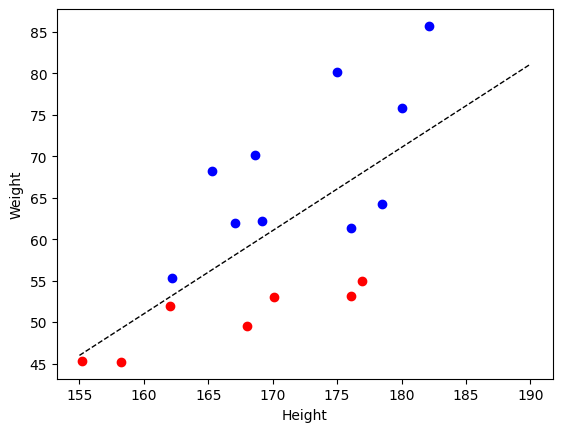

In [37]:
df_m = df[df.gender=="M"]
df_f = df[df.gender=="F"]
x_grid = np.linspace(155,190,10)
plt.scatter(x=df_m.height, y=df_m.weight, color='blue')
plt.scatter(x=df_f.height, y=df_f.weight, color='red')
plt.plot(x_grid, b0+b1*x_grid, linestyle='--', linewidth=1, color='black')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

formla -> weight ~ height + gender

In [38]:
gender_dummy = pd.get_dummies(df.gender, drop_first=True, prefix='gender')
X = df[['height']].join(gender_dummy)
y = df[['weight']]

In [40]:
lm.fit(X, y)
b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]
b2 = lm.coef_[0][1]
rsq2 = lm.score(X,y)
rmse2 = np.sqrt(metrics.mean_squared_error(y, lm.predict(X)))

In [41]:
print("Equation",f"{b0} + {b1}x + {b2}x2")
print("RSQ",rsq1)
print("RMSE",rmse)

Equation -59.45166117722759 + 0.65946131868032x + 14.253935223553647
RSQ 0.4411371950671864
RMSE 8.595442055909126


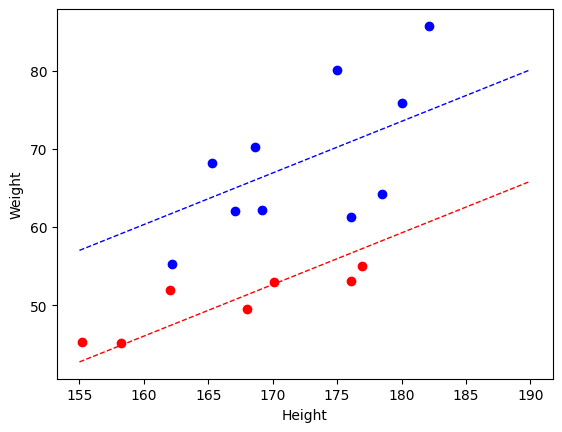

In [42]:
# Visualize.
# Distinguish the regression lines by gender.
df_m = df[df.gender=='M']
df_f = df[df.gender=='F']
x_grid = np.linspace(155,190,10)
plt.scatter(x=df_m.height, y=df_m.weight, color='blue')
plt.scatter(x=df_f.height, y=df_f.weight, color='red')
plt.plot(x_grid, b0 + b1*x_grid, linestyle='--',linewidth=1,color='red')
plt.plot(x_grid, (b0 + b2) + b1*x_grid, linestyle='--',linewidth=1,color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()